In [1]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt          
from matplotlib.backends.backend_pdf import PdfPages
#import plotly.graph_objs as go
%matplotlib inline

In [2]:
#libary getting stock data
from pandas_datareader import data as pdr

# library to forecast time series stock prices
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

In [3]:
days_to_extract = 1000
days_to_forecast = 20

In [4]:
date_end = dt.date.today()
date_start = date_end - dt.timedelta(days_to_extract)

In [5]:
date_end, date_start

(datetime.date(2021, 12, 5), datetime.date(2019, 3, 11))

In [6]:
df = pdr.DataReader("VUSA.L", 'yahoo', date_start, date_end).reset_index()

df = df.loc[df['Date'].notnull()]

In [7]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-03-11,40.355000,40.090000,40.235001,40.283749,281421.0,40.283749
1,2019-03-12,40.665001,40.105000,40.185001,40.660000,394741.0,40.660000
2,2019-03-13,40.657501,40.395000,40.400002,40.537498,232854.0,40.537498
3,2019-03-14,40.567501,40.222500,40.327499,40.311249,341492.0,40.311249
4,2019-03-15,40.529999,40.369999,40.529999,40.493752,222741.0,40.493752


In [8]:
m = Prophet()

In [9]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [10]:
#chaning columns names. fbprophet needst to get column name 'ds' for date and 'y' for value
df.columns = ['ds', 'High', 'Low', 'Open', 'y', 'Volume', 'Adj Close']
df

,ds,High,Low,Open,y,Volume,Adj Close
0,2019-03-11,40.355000,40.090000,40.235001,40.283749,281421.0,40.283749
1,2019-03-12,40.665001,40.105000,40.185001,40.660000,394741.0,40.660000
2,2019-03-13,40.657501,40.395000,40.400002,40.537498,232854.0,40.537498
3,2019-03-14,40.567501,40.222500,40.327499,40.311249,341492.0,40.311249
4,2019-03-15,40.529999,40.369999,40.529999,40.493752,222741.0,40.493752
...,...,...,...,...,...,...,...
685,2021-11-23,66.724998,66.007500,66.250000,66.269997,357520.0,66.269997
686,2021-11-24,67.187500,66.230003,66.537498,66.772499,257719.0,66.772499
687,2021-11-25,67.239998,66.962502,67.062500,67.062500,245777.0,67.062500
688,2021-11-26,66.300003,65.337502,65.997498,65.512497,674999.0,65.512497


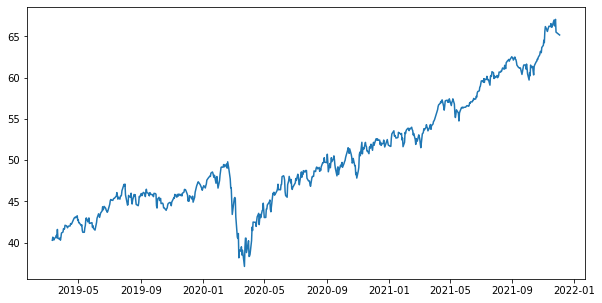

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df.set_index('ds').y)
plt.show()

In [12]:
m.fit(df)

Initial log joint probability = -3.13812
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2437.55     0.0114924       778.962           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2472.9    0.00668212       1241.38      0.3715           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     262       2488.07   5.37039e-05       297.745   1.293e-07       0.001      342  LS failed, Hessian reset 
     299       2492.26    0.00574692       1001.59           1           1      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     368       2502.09   3.31853e-05         180.2    1.42e-07       0.001      516  LS failed, Hessian reset 
     399       2502.95   0.000433161       289.722       0.195           1      553   
    Iter      log pro

In [13]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1050,2022-11-29
1051,2022-11-30
1052,2022-12-01
1053,2022-12-02
1054,2022-12-03


In [14]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1050,2022-11-29,79.888786,53.540781,103.368153
1051,2022-11-30,79.893415,53.462983,103.860209
1052,2022-12-01,79.900856,53.458800,103.507655
1053,2022-12-02,79.869246,53.761139,103.634727
1054,2022-12-03,78.920612,52.468464,102.991474


In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-11,41.450932,40.236881,42.160520,41.450932,41.450932,-0.285551,-0.285551,-0.285551,0.271647,0.271647,0.271647,-0.557198,-0.557198,-0.557198,0.0,0.0,0.0,41.165381
1,2019-03-12,41.485153,40.033082,42.029706,41.485153,41.485153,-0.415043,-0.415043,-0.415043,0.322828,0.322828,0.322828,-0.737871,-0.737871,-0.737871,0.0,0.0,0.0,41.070110
2,2019-03-13,41.519374,39.935633,41.950405,41.519374,41.519374,-0.594845,-0.594845,-0.594845,0.308174,0.308174,0.308174,-0.903020,-0.903020,-0.903020,0.0,0.0,0.0,40.924529
3,2019-03-14,41.553595,39.694030,41.787255,41.553595,41.553595,-0.755072,-0.755072,-0.755072,0.296942,0.296942,0.296942,-1.052014,-1.052014,-1.052014,0.0,0.0,0.0,40.798523
4,2019-03-15,41.587816,39.650249,41.673589,41.587816,41.587816,-0.938186,-0.938186,-0.938186,0.246241,0.246241,0.246241,-1.184426,-1.184426,-1.184426,0.0,0.0,0.0,40.649630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,2022-11-29,78.570744,53.540781,103.368153,52.579868,102.034167,1.318042,1.318042,1.318042,0.322828,0.322828,0.322828,0.995213,0.995213,0.995213,0.0,0.0,0.0,79.888786
1051,2022-11-30,78.607512,53.462983,103.860209,52.502690,102.136433,1.285904,1.285904,1.285904,0.308174,0.308174,0.308174,0.977729,0.977729,0.977729,0.0,0.0,0.0,79.893415
1052,2022-12-01,78.644279,53.458800,103.507655,52.426918,102.239618,1.256577,1.256577,1.256577,0.296942,0.296942,0.296942,0.959635,0.959635,0.959635,0.0,0.0,0.0,79.900856
1053,2022-12-02,78.681047,53.761139,103.634727,52.358192,102.335327,1.188199,1.188199,1.188199,0.246241,0.246241,0.246241,0.941959,0.941959,0.941959,0.0,0.0,0.0,79.869246


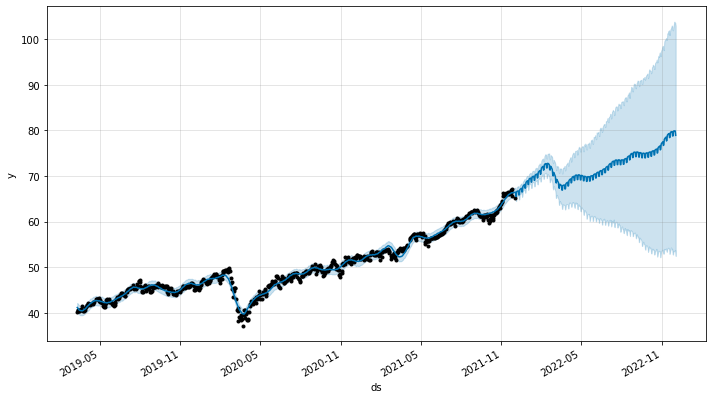

In [16]:
m.plot(forecast).autofmt_xdate()

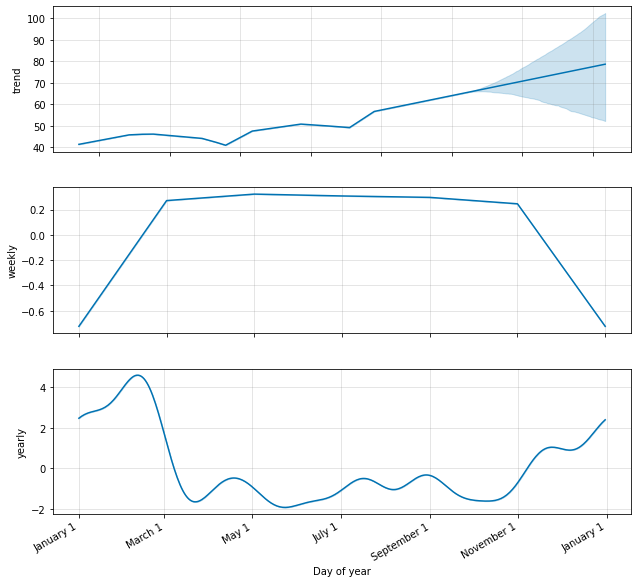

In [17]:
m.plot_components(forecast).autofmt_xdate()

In [18]:
df['log_y'] = np.log(df.y)
df['cap' ]= 90

m = Prophet(growth = 'logistic')
m.fit(df)

Initial log joint probability = -3.4175


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2390.08     0.0261525       718.343           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2402.33   0.000543926       173.786       0.368       0.368      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     286       2405.74   0.000106431       58.0189    1.03e-06       0.001      367  LS failed, Hessian reset 
     299       2405.92    0.00049879       72.4763           1           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     341       2408.25   0.000459801       259.112   7.868e-07       0.001      469  LS failed, Hessian reset 
     399       2410.41   0.000625953       89.9104           1           1      546   
    Iter      log prob        ||dx||      ||grad||       alpha

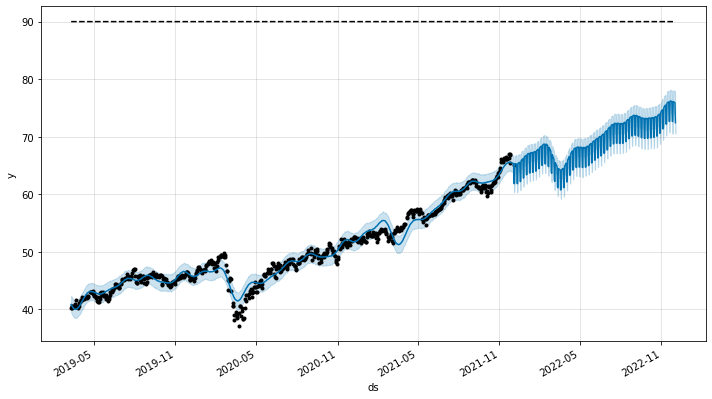

In [19]:
future = m.make_future_dataframe(periods=365)
future['cap'] = 90
fcst = m.predict(future)
m.plot(fcst).autofmt_xdate()
#m.plot(fcst, uncertainty=True).autofmt_xdate()

In [20]:
m.changepoints

22    2019-04-10
44    2019-05-15
66    2019-06-17
88    2019-07-17
110   2019-08-16
132   2019-09-18
154   2019-10-18
176   2019-11-19
198   2019-12-19
220   2020-01-23
242   2020-02-24
264   2020-03-25
287   2020-04-29
309   2020-06-02
331   2020-07-02
353   2020-08-03
375   2020-09-03
397   2020-10-05
419   2020-11-04
441   2020-12-04
463   2021-01-08
485   2021-02-09
507   2021-03-11
529   2021-04-14
551   2021-05-17
Name: ds, dtype: datetime64[ns]

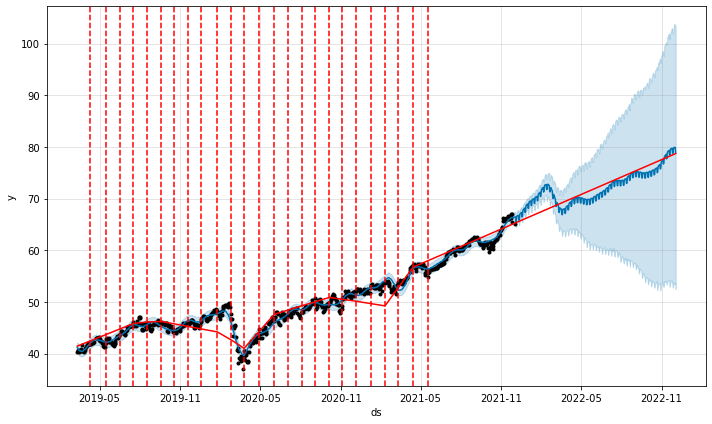

In [21]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast, threshold=0)
plt.show()

Initial log joint probability = -3.13812
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2466.18    0.00349527       778.091           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2539.4     0.0209959       2301.46           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2576.41    0.00475751       2218.81      0.3605           1      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2670.09     0.0184783       4536.68      0.7846      0.7846      435   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        2685.5   0.000247645       750.777      0.6653      0.6653      540   
    Iter      log prob        ||dx||      ||grad||       alpha  

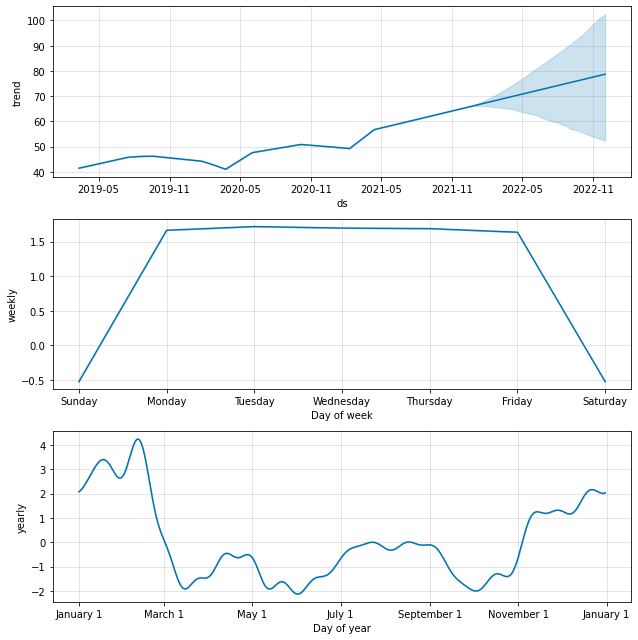

In [22]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=20,
    daily_seasonality=False
)

m.fit(df)
fig = m.plot_components(forecast)

# Plotly

In [23]:
import plotly.graph_objs as go
import plotly.offline as py

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [24]:
trace = go.Scatter(
    name = 'Actual price',
    mode = 'markers',
    x = list(forecast['ds']),
    y = list(df['y']),
    marker=dict(
        color='#FFBAD2',
        line=dict(width=1)
    )
)


In [25]:
trace1 = go.Scatter(
    name = 'trend',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat']),
    marker=dict(
        color='red',
        line=dict(width=3)
    )
)


In [26]:
upper_band = go.Scatter(
    name = 'upper band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_upper']),
    line= dict(color='#57b88f'),
    fill = 'tonexty'
)

In [27]:
lower_band = go.Scatter(
    name= 'lower band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_lower']),
    line= dict(color='#1705ff')
)

In [28]:
tracex = go.Scatter(
    name = 'Actual price',
   mode = 'markers',
   x = list(df['ds']),
   y = list(df['y']),
   marker=dict(
      color='black',
      line=dict(width=2)
   )
)

In [29]:
data = [tracex, trace1, lower_band, upper_band, trace]

layout = dict(title='Price Estimation Using FbProphet',
             xaxis=dict(title = 'Dates', ticklen=2, zeroline=True))

figure=dict(data=data,layout=layout)


In [30]:
fig = py.offline.iplot(figure)
# plt.show()

In [31]:
py.offline.plot(figure, filename='myplot.html')

'myplot.html'

import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()

In [32]:
df.head()

,ds,High,Low,Open,y,Volume,Adj Close,log_y,cap
0,2019-03-11,40.355000,40.090000,40.235001,40.283749,281421.0,40.283749,3.695948,90
1,2019-03-12,40.665001,40.105000,40.185001,40.660000,394741.0,40.660000,3.705245,90
2,2019-03-13,40.657501,40.395000,40.400002,40.537498,232854.0,40.537498,3.702227,90
3,2019-03-14,40.567501,40.222500,40.327499,40.311249,341492.0,40.311249,3.696631,90
4,2019-03-15,40.529999,40.369999,40.529999,40.493752,222741.0,40.493752,3.701148,90


In [33]:
df_melt = df.melt(id_vars=['ds', 'Volume', 'log_y'])
df_melt.head()

,ds,Volume,log_y,variable,value
0,2019-03-11,281421.0,3.695948,High,40.355000
1,2019-03-12,394741.0,3.705245,High,40.665001
2,2019-03-13,232854.0,3.702227,High,40.657501
3,2019-03-14,341492.0,3.696631,High,40.567501
4,2019-03-15,222741.0,3.701148,High,40.529999


In [35]:
import plotly.express as px

In [40]:
fig1 = px.line(df_melt, x='ds', y='value', color='variable' )
fig1.show()

In [41]:
fig2 = px.bar(df, x = list(df['ds']), y = list(df['y']),barmode="group")
fig2.show()

In [101]:
fig_t1 = go.Figure(data=[go.Table(header=dict(values=['ds', 'prediction']),
                 cells=dict(values=[ df.ds , df.y]))
                     ])
fig_t1.show()

In [99]:
import plotly.figure_factory as ff

fig_t =  ff.create_table(df.head(10))
fig_t.show()

In [64]:
import datetime as dt
df['mm'] = df['ds'].dt.month
df['yyyy'] = df['ds'].dt.year

In [94]:
pvt = pd.pivot_table(data=df, index='yyyy', columns='mm', values='y', aggfunc='sum')
pvt

##render dataframe as html
#pvt_html = pvt.to_html()
##write html to file
#text_file = open("index.html", "w")
#text_file.write(pvt_html)
#text_file.close()

mm,1,2,3,4,5,6,7,8,9,10,11,12
yyyy,,,,,,,,,,,,
2019,NaN,NaN,609.653740,844.937496,886.462505,867.658756,1048.668751,952.203751,963.740002,1028.205002,961.936249,919.554996
2020,1048.058743,965.574997,894.789997,843.073753,856.843742,1034.514999,1101.327503,979.429996,1087.730000,1098.974998,1073.434998,1095.078762
2021,1055.957500,1064.007500,1233.042500,1134.843750,1067.081249,1261.848747,1317.404999,1285.477509,1353.752048,1295.632500,1317.897507,65.167503


In [106]:
with open('p_graph.html', 'a') as f:
    f.write(fig1.to_html(full_html = False, include_plotlyjs = 'cdn'))
    f.write(fig2.to_html(full_html = False, include_plotlyjs = 'cdn'))
    f.write(fig_t1.to_html(full_html = False, include_plotlyjs = 'cdn'))
    f.write(fig_t.to_html(full_html = False, include_plotlyjs = 'cdn'))
    f.write(pvt.to_html())

In [96]:
import os
import subprocess 

In [97]:
#open folder
subprocess.run(['open', os.getcwd()], check=True)

CompletedProcess(args=['open', '/Users/reejungkim/Documents/Git/Time series/Time-Series-stock'], returncode=0)

In [107]:
#Open pdf file generated
subprocess.run(['open', 'p_graph.html'], check=True)

CompletedProcess(args=['open', 'p_graph.html'], returncode=0)